# Analise Funil SMS com evento PIX

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df=pd.read_csv("funil pix ultimo mes 1610-2022 v2.csv")
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),funnel_id,config_id,message,created_at,deleted_at,evento,evento_criado,evento_deletado
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,5,3505,1129937.60,582590.00,2780,1895,1518,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,NaN
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.00,0.00,0,0,830,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,13,182,17420.09,9378.48,176,99,1448,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,NaN
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 1,7,894,148844.94,31888.20,303,204,645,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,NaN
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 1,8,5358,880730.49,124195.66,1488,814,1185,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.00,0.00,0,0,1505,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.00,0.00,0,0,1508,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,NaN
86,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,8,1336.88,1336.88,8,8,1566,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,NaN
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,0.00,3,0,1622,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,NaN


In [177]:
df.drop(columns="evento_deletado", axis=1, inplace=True)
df.isnull().sum()

produtor                            0
empresa                             0
site                                0
squad                               0
lojas_criadas                       0
pedidos_aprovados                   0
total_aprovado                      0
sum(orders_pix_approved)            0
sum(t.orders_pix_amount)            0
sum(orders_pix_approved_amount)     0
funnel_id                           0
config_id                           0
message                             0
created_at                          0
deleted_at                         48
evento                              0
evento_criado                       0
dtype: int64

### Período da Análise de Processamento foi determinado anteriormente, na extração de dados via MySQL: Entre 15/09/2022 a 15/10/2022

In [178]:
df["conversao_pix"] = round(df['sum(orders_pix_approved_amount)']/df['sum(t.orders_pix_amount)']*100,2)
df

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),funnel_id,config_id,message,created_at,deleted_at,evento,evento_criado,conversao_pix
0,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,Manifestando o Segredo,CSM 3,5,3505,1129937.60,582590.00,2780,1895,1518,6,"Olá, agora pague o pix do box do milhão. Seu c...",2022-08-08 03:37:08,2022-08-08 03:37:28,PIX Gerado,2021-12-13 16:39:33,68.17
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.00,0.00,0,0,830,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
2,Lucas Vsjgyn,Leemarii,Leemarii,Farmer 1,13,182,17420.09,9378.48,176,99,1448,6,"Oi {Primeiro_nome}, Recebemos Seu Pedido Com S...",2022-09-24 01:59:26,2022-10-01 06:35:47,PIX Gerado,2021-12-13 16:39:33,56.25
3,Thiago Carboni Reiter,THP COMMERCE,Bazar Do Brasil,Farmer 1,7,894,148844.94,31888.20,303,204,645,6,Olá {Primeiro_nome} seu pix foi gerado com suc...,2022-01-31 21:41:19,2022-01-31 21:45:57,PIX Gerado,2021-12-13 16:39:33,67.33
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Femina Shop,Key account 1,8,5358,880730.49,124195.66,1488,814,1185,6,{Primeiro_nome} Pague seu pix no valor: {Valor...,2022-01-31 18:45:33,2022-01-31 18:48:36,PIX Gerado,2021-12-13 16:39:33,54.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.00,0.00,0,0,1505,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.00,0.00,0,0,1508,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,NaN
86,MICHEL RODRIGUES WOLFER,AUTOMOTIVE TINTAS LTDA,Conforto e Ofertas,Farmer 1,2,8,1336.88,1336.88,8,8,1566,6,{Primeiro_nome} Volte e finalize seu pedido ai...,2022-09-04 19:23:40,2022-09-04 21:01:23,PIX Gerado,2021-12-13 16:39:33,100.00
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,0.00,3,0,1622,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0.00


In [179]:
total = len(df)
print(f"Diagnosticou-se que {total} parceiros criaram o funil personalizado com o evento 'PIX Gerado'.")

Diagnosticou-se que 89 parceiros criaram o funil personalizado com o evento 'PIX Gerado'.


### Representatividade TPV

In [180]:
TPV_df = df.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),conversao_pix
33,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 1,10,26655,8378204.94,919654.86,5700,3381,59.32
88,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,3574,1186995.54,9642.44,50,38,76.00
67,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,5690,1175358.55,375496.35,2355,1990,84.50
46,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,CSM 3,5,3505,1129937.60,582590.00,2780,1895,68.17
13,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Key account 1,8,5358,880730.49,124195.66,1488,814,54.70
31,Guilherme Fagundes Peres,CYGNUS,Farmer 1,3,3816,734418.54,177994.02,1356,996,73.45
85,UENIO MENDES MARTINEZ,MARTINEZ MIDIA,CSM 3,4,2508,374647.44,61747.44,780,484,62.05
50,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,528,360871.30,83443.92,225,142,63.11
61,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,11,2135,329364.74,64139.83,800,453,56.62
84,Thiago Carboni Reiter,THP COMMERCE,Farmer 1,7,894,148844.94,31888.20,303,204,67.33


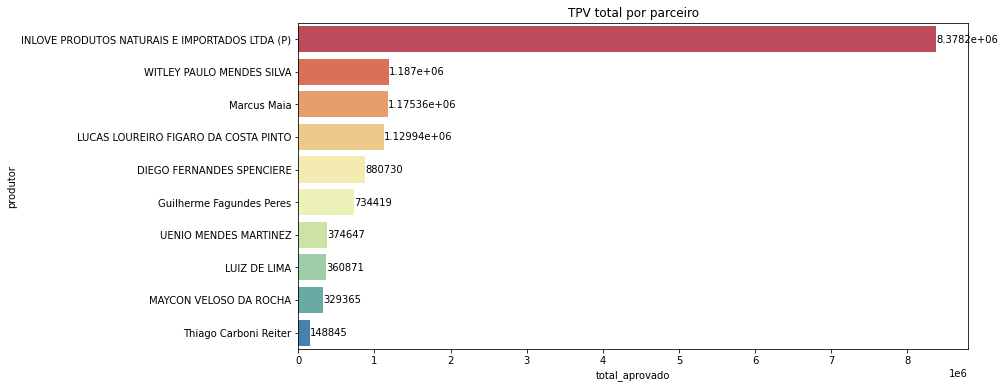

In [181]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

In [182]:
TPV_total = TPV_df.total_aprovado.sum()
print(f"Todos os parceiros representam o total de R${round(TPV_total,2)}")

Todos os parceiros representam o total de R$15982918.56


### Contribuição do PIX no TPV de cada PARCEIRO

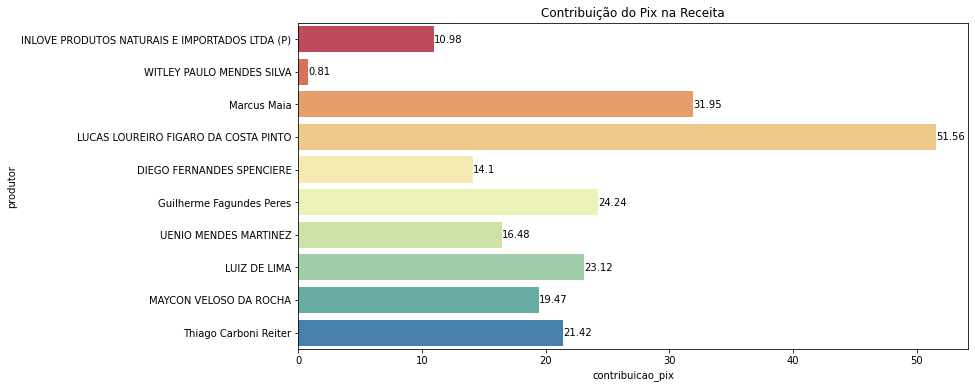

In [183]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Conversão PIX

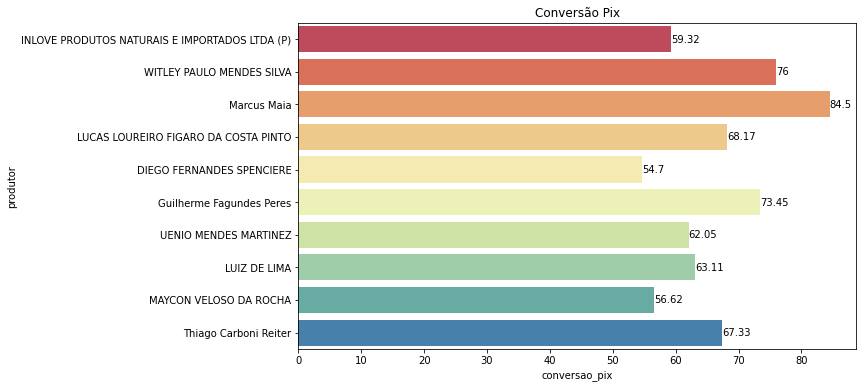

In [184]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

### Contribuição do PIX no TPV de cada SQUAD

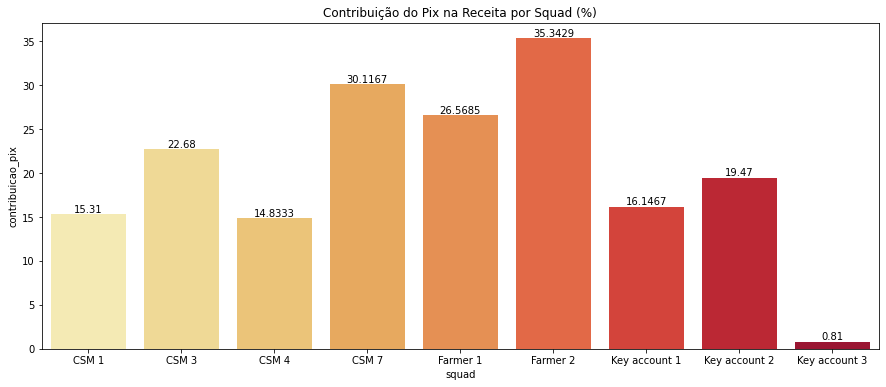

In [185]:
TPV_squad = TPV_df.groupby("squad", as_index=False).mean()

plt.figure(figsize=(15,6))
plt.title("Contribuição do Pix na Receita por Squad (%)")

ax = sns.barplot(y=TPV_squad['contribuicao_pix'], x=TPV_squad['squad'],palette='YlOrRd')

for container in ax.containers:
    ax.bar_label(container)

### Conversão do PIX de cada SQUAD

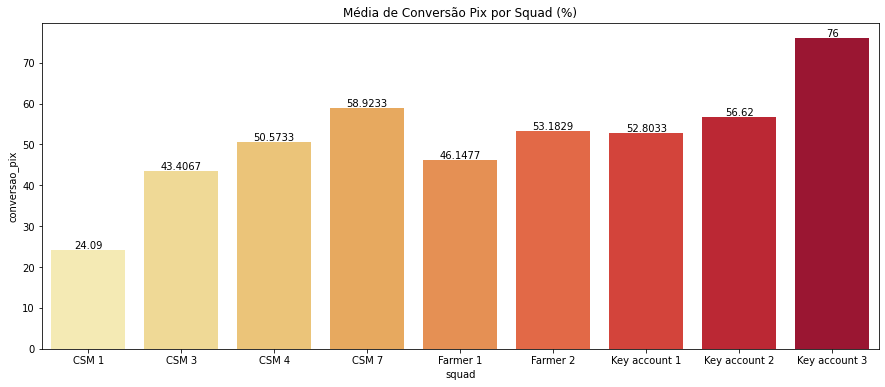

In [186]:


plt.figure(figsize=(15,6))
plt.title("Média de Conversão Pix por Squad (%)")

ax = sns.barplot(y=TPV_squad['conversao_pix'], x=TPV_squad['squad'],palette='YlOrRd')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros com o Funil Desativado

* Período da Exclusão do Funil Personalizado: Considera todo o período da empresa (sem filtro)

In [187]:
deleted = df.dropna()

In [188]:
amount_deleted = len(deleted)
print(f"Desses {total} parceiros, {amount_deleted} desativaram o funil de sms personalizado.")

Desses 89 parceiros, 16 desativaram o funil de sms personalizado.


#### Representatividade TPV

In [189]:
deleted_TPV = deleted.total_aprovado.sum()
print(f"Estes {amount_deleted} desativados representam {deleted_TPV} do TPV mensal da empresa.")

Estes 16 desativados representam 3738839.08 do TPV mensal da empresa.


In [190]:
TPV_df = deleted.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),conversao_pix
11,LUCAS LOUREIRO FIGARO DA COSTA PINTO,Digital Bros Agency Criação E Lançamento De In...,CSM 3,5,3505,1129937.60,582590.00,2780,1895,68.17
4,DIEGO FERNANDES SPENCIERE,D F SPENCIERE SOM AUTOMOTIVO,Key account 1,8,5358,880730.49,124195.66,1488,814,54.70
8,Guilherme Fagundes Peres,CYGNUS,Farmer 1,3,3816,734418.54,177994.02,1356,996,73.45
15,UENIO MENDES MARTINEZ,MARTINEZ MIDIA,CSM 3,4,2508,374647.44,61747.44,780,484,62.05
14,Thiago Carboni Reiter,THP COMMERCE,Farmer 1,7,894,148844.94,31888.20,303,204,67.33
9,JADERSON SCHNEIDER,JS MARKETING,Farmer 1,5,786,124753.26,55968.00,1098,384,34.97
0,ANDRE LUIS RODRIGUES,ALLREPRES,CSM 7,7,716,121163.40,29761.60,634,226,35.65
7,Guilherme Cachoeira Ramos,SIM NEGOCIOS DIGITAIS LTDA,CSM 7,3,351,67537.61,20956.11,233,120,51.50
10,Joao Pedro Cardoso Zebende,BODY SHAPER BRASIL,Farmer 1,7,548,63063.84,23357.74,372,226,60.75
5,Danilo Rodrigues,RODS MARKETING,Farmer 1,7,133,18572.19,4031.65,63,35,55.56


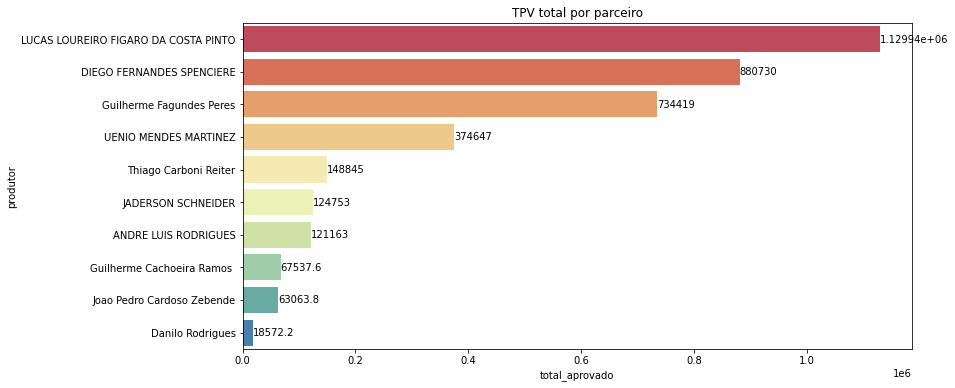

In [191]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Contribuição do PIX no TPV de cada PARCEIRO que desativou o funil personalizado

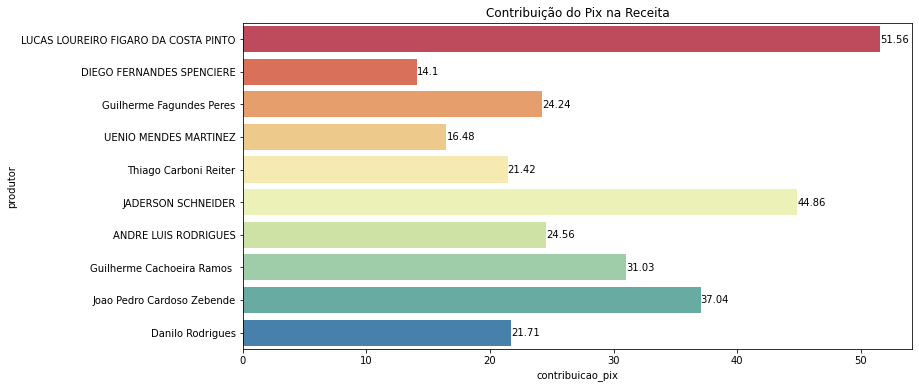

In [192]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que desativou o funil personalizado

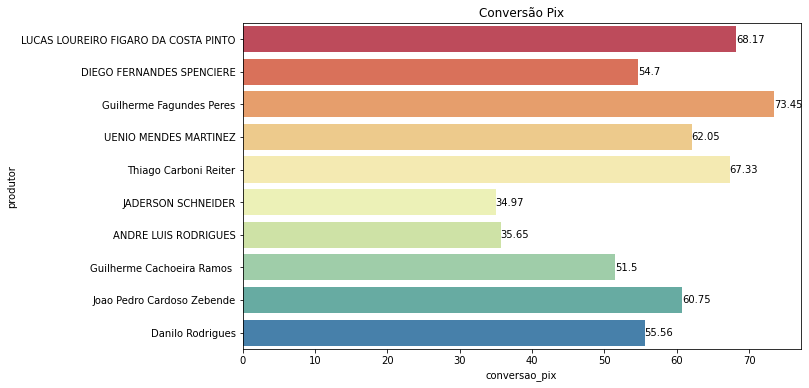

In [193]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

## Parceiros que manteram o funil automático ativo

In [194]:
active = df.drop(deleted.index)
active

,produtor,empresa,site,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),funnel_id,config_id,message,created_at,deleted_at,evento,evento_criado,conversao_pix
1,Roberto Costa (P),Conecta Ideias - Marketing LTDA,My History,Key account 1,13,0,0.00,0.00,0,0,830,6,{Primeiro_nome}; Para finalizar o pedido de VI...,2022-05-18 19:04:32,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
5,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,Programa LotoMais,CSM 4,12,5690,1175358.55,375496.35,2355,1990,550,6,PROGRAMA LOTOMAIS - Para finalizar seu pedido...,2022-02-10 06:34:07,NaN,PIX Gerado,2021-12-13 16:39:33,84.50
6,Fabio Rodrigues,LAURENS,OutBela,Farmer 2,8,0,0.00,0.00,0,0,291,6,Olá {Primeiro_nome} obrigado pela compra na {N...,2022-05-10 22:24:51,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
7,DEIVID MONTEIRO DOS SANTOS (P),DEIVID MONTEIRO DOS SANTOS (P),Distribuidora katarina,CSM 4,6,100,146519.19,7973.51,29,7,1049,6,segue seu código pix {Codigo_pix},2022-03-08 21:05:27,NaN,PIX Gerado,2021-12-13 16:39:33,24.14
8,FPG DE PAULA NEGOCIOS ONLINE LTDA (P),SLT NEGOCIOS ONLINE,Solitarystore,CSM 1,5,522,68478.93,20970.17,357,172,1633,6,"Olá {Primeiro_nome}, pague seu pix agora mesmo...",2022-10-05 16:12:19,NaN,PIX Gerado,2021-12-13 16:39:33,48.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Matheus Moyano Portugal,Click Preços,Click Preços,Farmer 1,1,21,2747.00,254.00,4,2,1580,6,"Olá, {Primeiro_nome}. Parabéns pela compra da ...",2022-09-08 18:21:32,NaN,PIX Gerado,2021-12-13 16:39:33,50.00
84,Marcela Pereira,Amezz,Amezz,Farmer 1,2,0,0.00,0.00,0,0,1505,6,"Olá {Primeiro_nome}, O seu pedido foi reservad...",2022-08-01 03:53:54,NaN,PIX Gerado,2021-12-13 16:39:33,NaN
85,Gabriel Lucas Taguti Oshiro,Loja Vou Levar Agora,Vou Levar Agora,Farmer 2,1,0,0.00,0.00,0,0,1508,6,{Primeiro_nome} Os seus produtos estão esperan...,2022-08-02 05:39:37,2022-08-02 20:29:04,PIX Gerado,2021-12-13 16:39:33,NaN
87,LARYSSA FERREIRA COSTA ALVAREZ,LA MARKETING,Cardápios Flexíveis,Farmer 1,1,0,0.00,0.00,3,0,1622,6,"Olá {Primeiro_nome}, segue seu código Pix para...",2022-09-28 20:33:43,NaN,PIX Gerado,2021-12-13 16:39:33,0.00


In [195]:
amount_active = len(active)
print(f"Outros {amount_active} manteram o funil de sms personalizado ativo.")

Outros 73 manteram o funil de sms personalizado ativo.


#### Representatividade TPV

In [196]:
TPV_df = active.groupby(['produtor','empresa','squad'],as_index=False).sum().sort_values(by='total_aprovado', ascending=False).drop(columns=['funnel_id','config_id'])
TPV_df = TPV_df[TPV_df['total_aprovado'] > 0]
TPV_df

,produtor,empresa,squad,lojas_criadas,pedidos_aprovados,total_aprovado,sum(orders_pix_approved),sum(t.orders_pix_amount),sum(orders_pix_approved_amount),conversao_pix
24,INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),INLOVE PRODUTOS NATURAIS E IMPORTADOS LTDA (P),Key account 1,10,26655,8378204.94,919654.86,5700,3381,59.32
72,WITLEY PAULO MENDES SILVA,WA INTERMEDIACAO DE NEGOCIOS DIGITAIS LTDA,Key account 3,3,3574,1186995.54,9642.44,50,38,76.00
53,Marcus Maia,LOTO M. NEGOCIOS DIGITAIS,CSM 4,12,5690,1175358.55,375496.35,2355,1990,84.50
38,LUIZ DE LIMA,BARATO PRATICO,CSM 4,5,528,360871.30,83443.92,225,142,63.11
48,MAYCON VELOSO DA ROCHA,ROCHA ECOM,Key account 2,11,2135,329364.74,64139.83,800,453,56.62
8,DEIVID MONTEIRO DOS SANTOS (P),DEIVID MONTEIRO DOS SANTOS (P),CSM 4,6,100,146519.19,7973.51,29,7,24.14
37,LUCCA PROTASIO DAZZANI,INOVATI,CSM 4,8,992,128476.16,28878.74,374,218,58.29
6,CHRISTIAN TAVARES PRADO FRESSATO,ISB INTERMEDIACAO DE NEGOCIOS LTDA,CSM 3,8,998,123033.28,0.00,0,0,0.00
55,Matheus Antonio Sgarbossa Pedroso,ZATELLI,CSM 4,2,1071,98079.67,5899.26,94,69,73.40
16,FPG DE PAULA NEGOCIOS ONLINE LTDA (P),SLT NEGOCIOS ONLINE,CSM 1,5,522,68478.93,20970.17,357,172,48.18


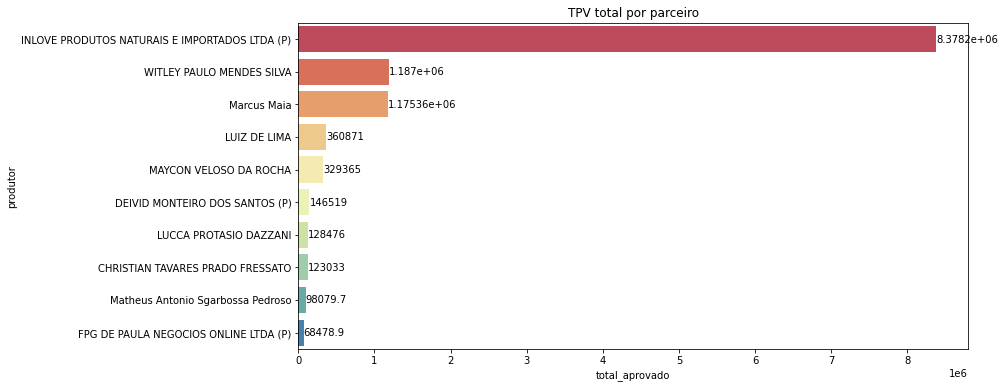

In [197]:
plt.figure(figsize=(12,6))
plt.title("TPV total por parceiro")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['total_aprovado'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Contribuição do PIX no TPV de cada PARCEIRO que manteve o funil personalizado ativo

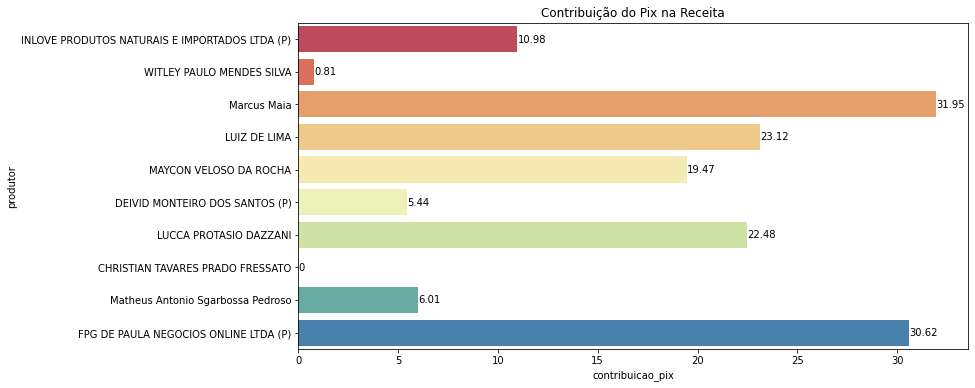

In [198]:
TPV_df['contribuicao_pix'] = round(TPV_df['sum(orders_pix_approved)']/TPV_df['total_aprovado']*100,2)

plt.figure(figsize=(12,6))
plt.title("Contribuição do Pix na Receita")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['contribuicao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)

#### Conversão do PIX de cada PARCEIRO que manteve o funil personalizado ativo

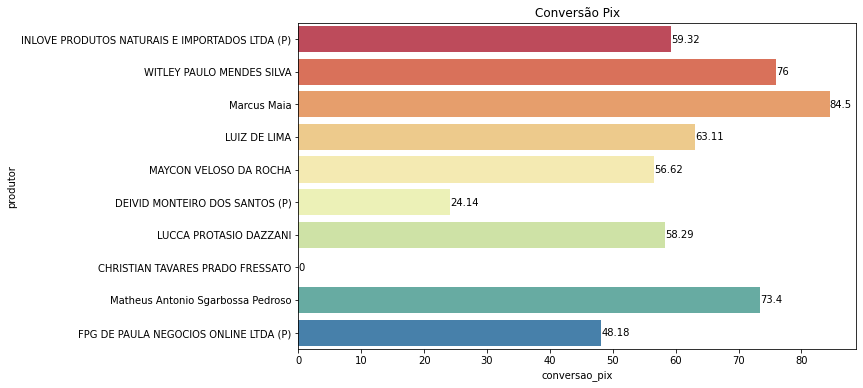

In [199]:
plt.figure(figsize=(10,6))
plt.title("Conversão Pix")


top10 = TPV_df.head(10)
ax = sns.barplot(x=top10['conversao_pix'], y=top10['produtor'],palette='Spectral')

for container in ax.containers:
    ax.bar_label(container)